# Kalman Filtering

In [1]:
import Simulator
import Observation
import Statistics
import KalmanFilter

## Loading simulator 

For Kalman filtering we have to be able to propagate a Gaussian distribution in time and to have access to the linear operators

In [2]:
timestamp = "2022_03_02-12_44_46"

grid, simulator = Simulator.from_file(timestamp)

## Definition of initial distribution 

The inital state is equipped with a Gaussian distribution specified by its mean and covariance. 

In [3]:
statistics = Statistics.Statistics(simulator, safe_history=True)

Please remember to set priors!


In [4]:
obs_timestamp = "2022_03_02-12_44_53"
observation = Observation.from_file(grid, timestamp, obs_timestamp)

Remember to set observation positions and to set/observe values!


### KF 

In [7]:
# Plots for the paper
import numpy as np
kf_prior_means = np.zeros((11,grid.N_x))
kf_prior_covs = np.zeros((11,grid.N_x,grid.N_x))

kf_posterior_means = np.zeros((11,grid.N_x))
kf_posterior_covs = np.zeros((11,grid.N_x,grid.N_x))

In [8]:
kf_prior_means[0] = statistics.mean
kf_prior_covs[0]  = statistics.cov

kalmanFilter = KalmanFilter.Kalman(statistics, observation)

kf_posterior_means[0] = statistics.mean
kf_posterior_covs[0]  = statistics.cov

for t in range(observation.N_obs):
    print(t)
    statistics.propagate(25)

    kf_prior_means[t+1] = statistics.mean
    kf_prior_covs[t+1]  = statistics.cov

    kalmanFilter.filter(statistics.mean, statistics.cov, observation.obses[t])

    kf_posterior_means[t+1] = statistics.mean
    kf_posterior_covs[t+1]  = statistics.cov

0
1
2
3
4
5
6
7
8
9


/home/florianb/miniconda3/envs/advecdiff/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/florianb/miniconda3/envs/advecdiff/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/florianb/miniconda3/envs/advecdiff/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/florianb/miniconda3/envs/advecdiff/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/florianb/miniconda3/envs/advecdiff/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the 

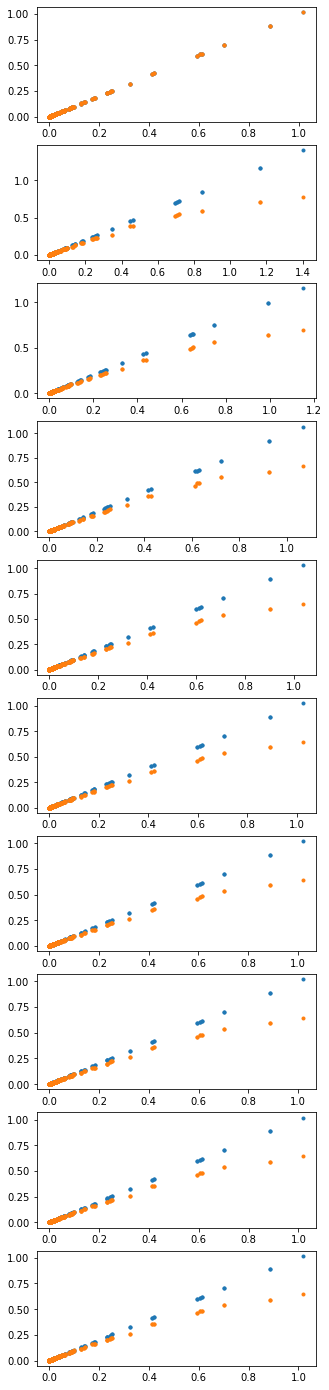

In [15]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(10, 1, figsize=(5,25))
for t in range(10):
    prior_w = np.sort(np.linalg.eig(kf_prior_covs[t])[0])
    posterior_w = np.sort(np.linalg.eig(kf_posterior_covs[t])[0])
    axs[t].plot(prior_w, prior_w, ".")
    axs[t].plot(prior_w, posterior_w, ".")